# Plotting handshape distributions

This notebook examines handshape distributions in SS-glosses and compares them with distributions from ASL-LEX 2.0 annotations. Please ensure you've completed either the KMeans or ED annotation process before proceeding. This analysis will help highlight the differences and similarities between traditional and newly proposed handshape annotations.

In [4]:
# Count the frequency of unique values in the column
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

old_handshapes = '../data/wlasl_subset.json'
new_handshapes = '../data/wlasl_kmeans.json'


def get_handshapes(metadata_input):
    with open(metadata_input, 'r') as file:
        data = json.load(file)

    # Step 2 & 3: Process the data and save to a dictionary
    gloss_handshape_dict = {}
    for entry in data:
        gloss = entry['gloss']
        # Ensure there is at least one instance and it has the 'Handshape' key
        if entry['instances'] and 'Handshape' in entry['instances'][0]:
            handshape = entry['instances'][0]['Handshape']
            gloss_handshape_dict[gloss] = handshape

    print("Data has been processed and saved.")
    return  gloss_handshape_dict

hs_og = get_handshapes(old_handshapes)
hs_new = get_handshapes(new_handshapes)

Data has been processed and saved.
Data has been processed and saved.


#### Estimate Value Counts

In [7]:
hs = pd.DataFrame(hs_og.items(), columns=['Gloss', 'Handshape'])
hs['Handshape'] = hs['Handshape'].astype(str).str.strip()

hs_vs = hs.value_counts('Handshape').reset_index()

# Read the file into a DataFrame, assuming the separator is a comma
new_hs = pd.DataFrame(hs_new.items(), columns=['Gloss', 'Handshape'])
new_hs['Handshape'] = new_hs['Handshape'].astype(str).str.strip()

# Display the DataFrame
new_hs_vs = new_hs.value_counts('Handshape').reset_index()



#### Plot distributions

In [13]:
# Combine the two DataFrames into a single DataFrame
combined_df = pd.concat([hs_vs, new_hs_vs])

# Convert 'Handshape' to a categorical type to ensure consistent order across plots
hs_vs['Handshape'] = pd.Categorical(hs_vs['Handshape'], categories=pd.unique(hs_vs['Handshape']))
hs_vs['Handshape'] = hs_vs['Handshape'].replace('-1', 'Unlabeled')


new_hs_vs['Handshape'] = pd.Categorical(new_hs_vs['Handshape'], categories=pd.unique(new_hs_vs['Handshape']))
new_hs_vs['Handshape'] = new_hs_vs['Handshape'].replace('-1', 'Unlabeled')


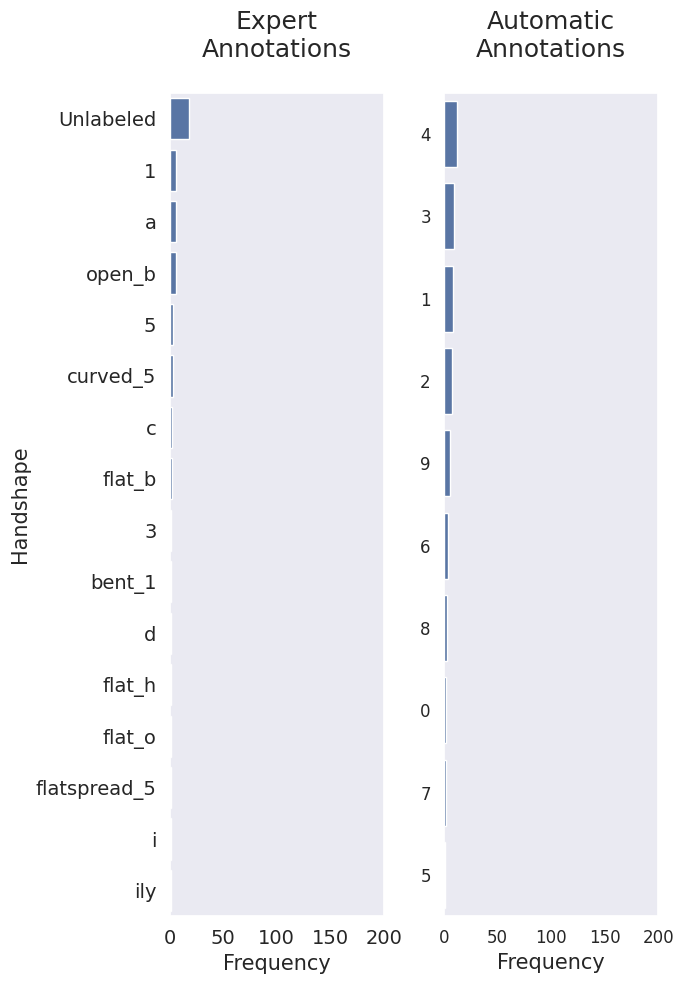

<Figure size 640x480 with 0 Axes>

In [15]:
# Set the style
sns.set_style("dark")

# Create a subplot grid of 1 row x 2 columns, without sharing the y-axis
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 10))

# Plot the first barplot
sns.barplot(y='Handshape', x='count', data=hs_vs, ax=axs[0])
axs[0].set_ylabel('Handshape', size=15)
axs[0].set_xlabel('Frequency', size=15)
axs[0].set_title('Expert\nAnnotations\n', size=18)
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)
axs[0].set_xticks(range(0, 201, 50))  # Sets x-ticks for the first subplot


# Plot the second barplot
sns.barplot(y='Handshape', x='count', data=new_hs_vs, ax=axs[1])
axs[1].set_ylabel('', size=15)  # Setting y-label since they are not shared
axs[1].set_xlabel('Frequency', size=15)
axs[1].set_title('Automatic\nAnnotations\n', size=18)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].set_xticks(range(0, 201, 50))  # Sets x-ticks for the first subplot

# axs[1].tick_params(axis='y', labelsize=10) # Not needed due to sharey=True

plt.tight_layout()  # Adjust layout to make room for the plots
plt.savefig('../figures/handshape_distributions.png')  # Save the plot to a file
plt.show()
